## Desen Kodla:

İŞLEMDE KULLANILAN 3 ADET İMG VE LABEL

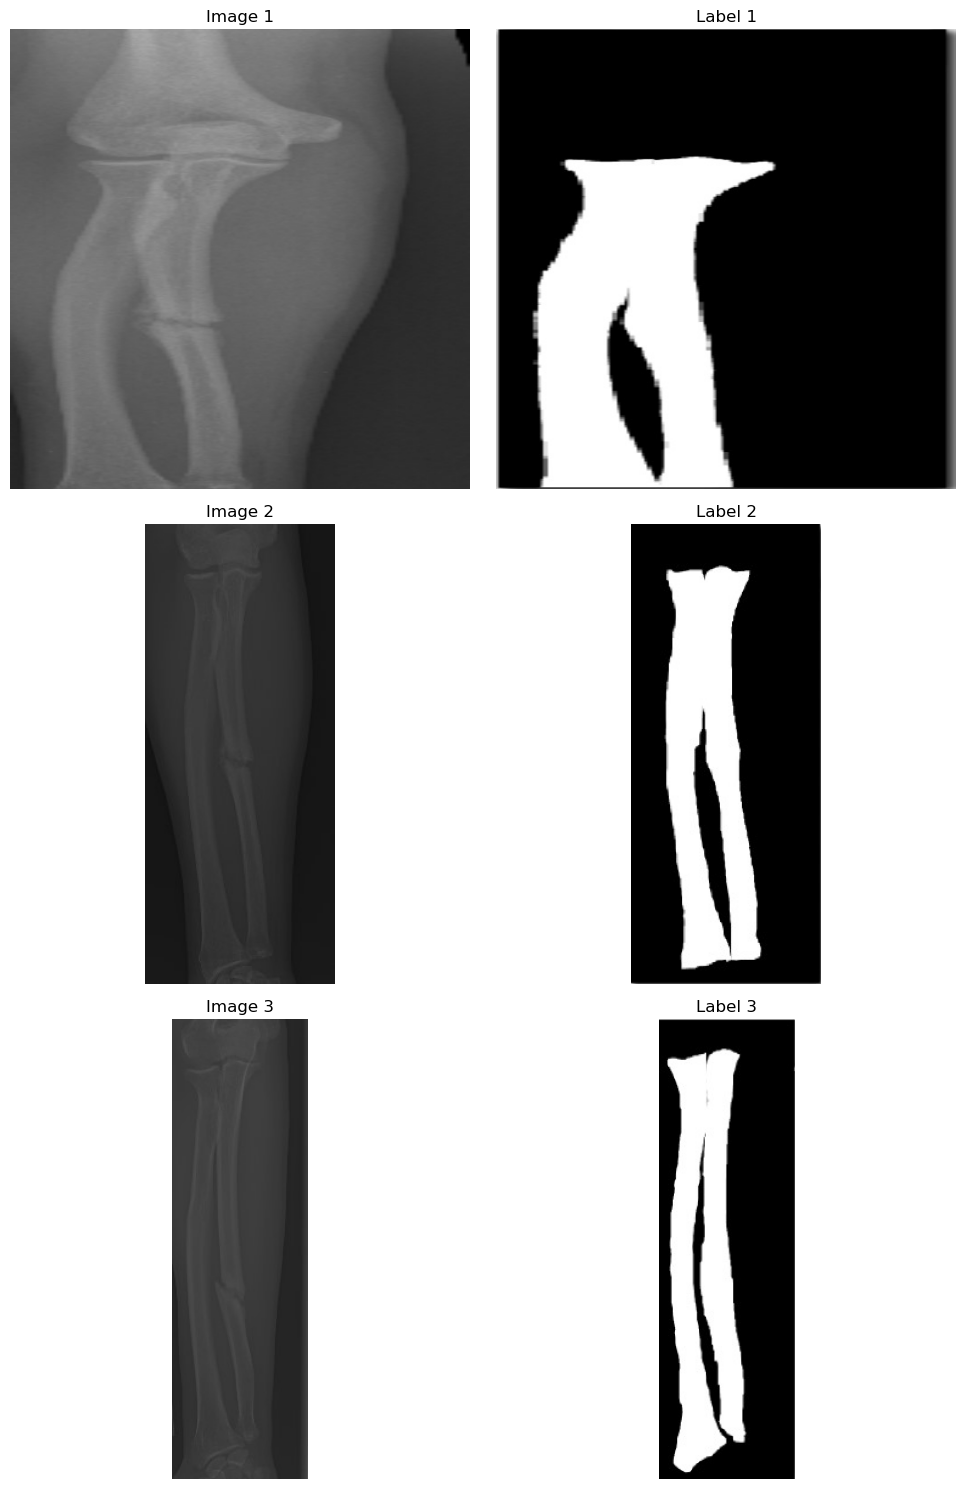

In [1]:
import matplotlib.pyplot as plt
import cv2

def display_images(image_paths, label_paths):
    # Calculate grid dimensions
    num_images = len(image_paths)
    
    # Create figure and axes
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5*num_images))
    
    # Read and display images
    for i, (img_path, label_path) in enumerate(zip(image_paths, label_paths)):
        # Read image and label
        img = cv2.imread(img_path)
        label = cv2.imread(label_path)
        
        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
        
        # Display image
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f'Image {i+1}')
        axes[i, 0].axis('off')
        
        # Display label
        axes[i, 1].imshow(label)
        axes[i, 1].set_title(f'Label {i+1}')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    r"C:\Users\SERDAL\Desktop\kirik6velabel\kirik6.jpg",
    r"C:\Users\SERDAL\Desktop\kirik3velabe\kirik3.jpg",
    r"C:\Users\SERDAL\Desktop\kirik2velabel\kirik2.jpg"
]
label_paths = [
    r"C:\Users\SERDAL\Desktop\kirik6velabel\kirik6label.jpg",
    r"C:\Users\SERDAL\Desktop\kirik3velabe\kirik3label.jpg",
    r"C:\Users\SERDAL\Desktop\kirik2velabel\kirik2label.jpg"
]
display_images(image_paths, label_paths)

## HOG hesaplama:

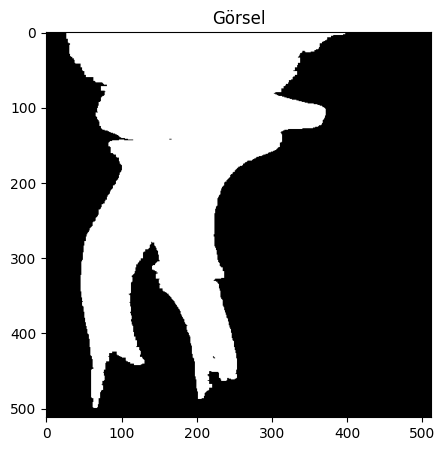

HoG Vektörü Boyutu: (142884,)


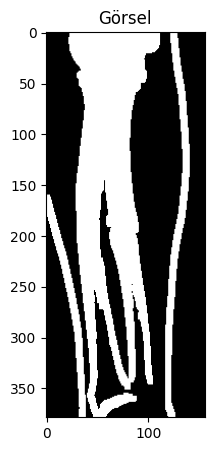

HoG Vektörü Boyutu: (29808,)


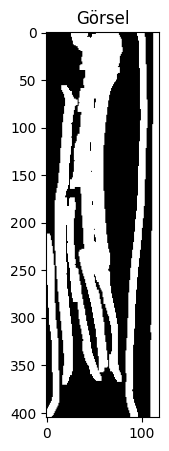

HoG Vektörü Boyutu: (22932,)


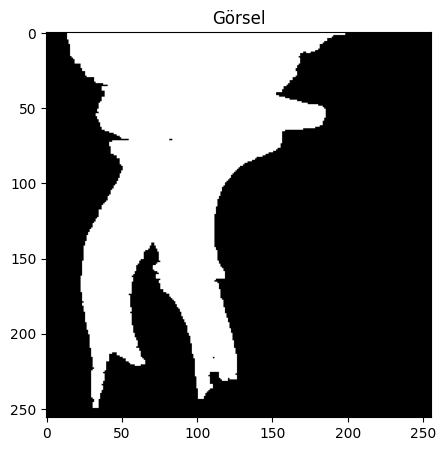

HoG Vektörü Boyutu: (34596,)


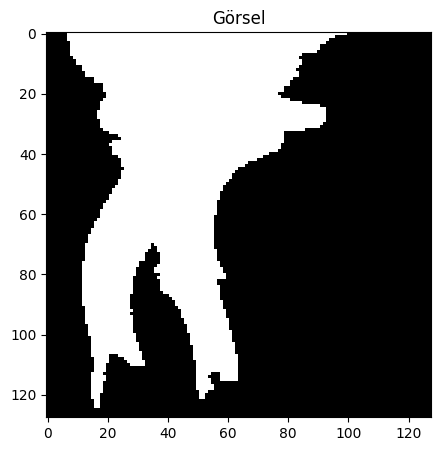

HoG Vektörü Boyutu: (8100,)


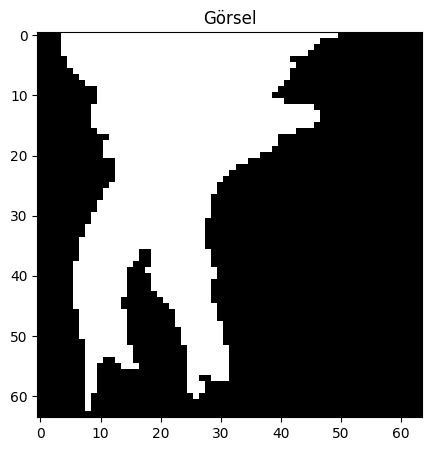

HoG Vektörü Boyutu: (1764,)


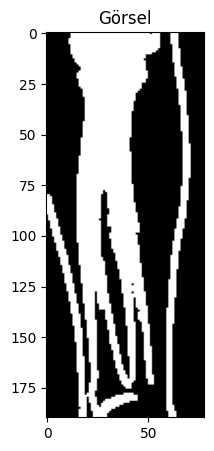

HoG Vektörü Boyutu: (6336,)


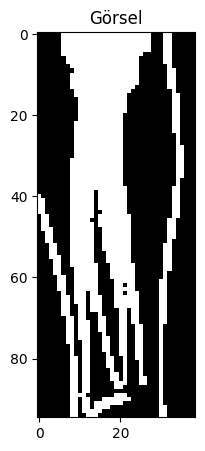

HoG Vektörü Boyutu: (1764,)


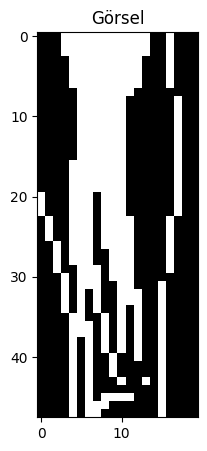

HoG Vektörü Boyutu: (1764,)


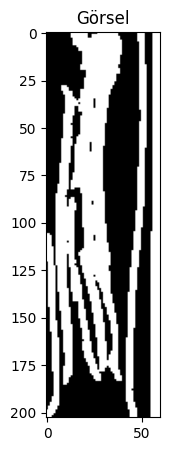

HoG Vektörü Boyutu: (1764,)


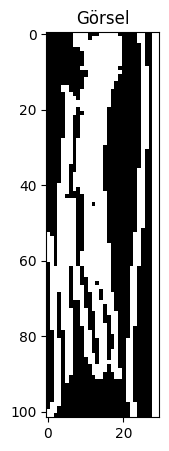

HoG Vektörü Boyutu: (1764,)


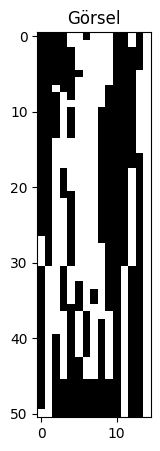

Görsel C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png boyut nedeniyle işlenemedi.

Tüm görseller işlendi.


In [9]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

# Görsel boyutu kontrolü ve yeniden boyutlandırma
def preprocess_image(image, min_size=(16, 16), target_size=(64, 64)):
    if image.shape[0] < min_size[0] or image.shape[1] < min_size[1]:
        # Görselin boyutu çok küçükse None döndürülür
        return None
    if image.shape[0] < target_size[0] or image.shape[1] < target_size[1]:
        # Görselin boyutu hedef boyuttan küçükse yeniden boyutlandırılır
        resized_image = resize(image, target_size, anti_aliasing=True)
        return resized_image
    return image

# HoG vektörü hesaplama
def compute_hog_vector(image):
    try:
        hog_features, hog_image = hog(
            image,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=True,
            transform_sqrt=True
        )
        print(f"HoG Vektörü Boyutu: {hog_features.shape}")
        return hog_features, hog_image
    except ValueError as e:
        return None, None

# Görsel yükleme (label ile ilgilenilmiyor)
def load_and_show_image(image_path):
    image = imread(image_path, as_gray=True)

    # Görseli ekrana çiz
    plt.figure(figsize=(5, 5))
    plt.title("Görsel")
    plt.imshow(image, cmap='gray')
    plt.show()

    return image

# Görsel yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

hog_vectors = []
hog_images = []

# Görsellerin işlenmesi
for i, image_path in enumerate(image_paths):
    image = load_and_show_image(image_path)

    # Görsel ön işleme (boyut kontrolü ve yeniden boyutlandırma)
    processed_image = preprocess_image(image)
    if processed_image is None:
        print(f"Görsel {image_path} boyut nedeniyle işlenemedi.")
        continue

    # HoG işlemi
    hog_vector, hog_image = compute_hog_vector(processed_image)
    if hog_vector is None:
        print(f"Görsel {image_path} için HoG vektörü hesaplanamadı.")
        continue

    # Sonuçları kaydet
    hog_vectors.append(hog_vector)
    hog_images.append(hog_image)

print("\nTüm görseller işlendi.")



### Hog vektörlerini test etme:

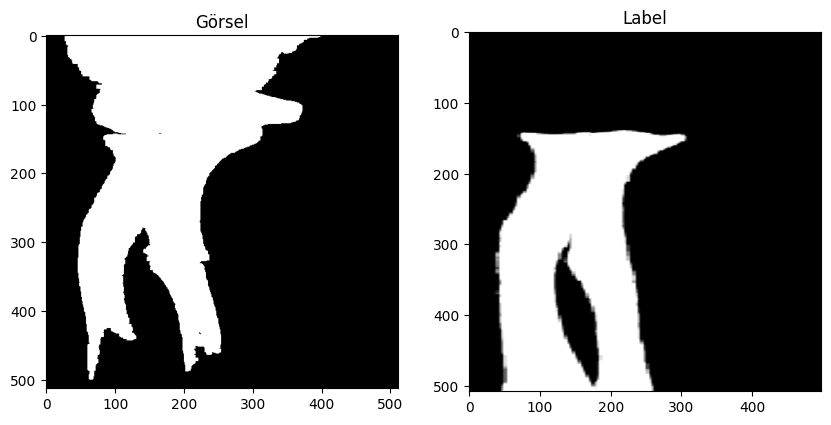

HoG Vektörü Boyutu: (142884,)
Görsel 1 için Eşleşme Skoru: 0.04650809101327818
Görsel 1 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

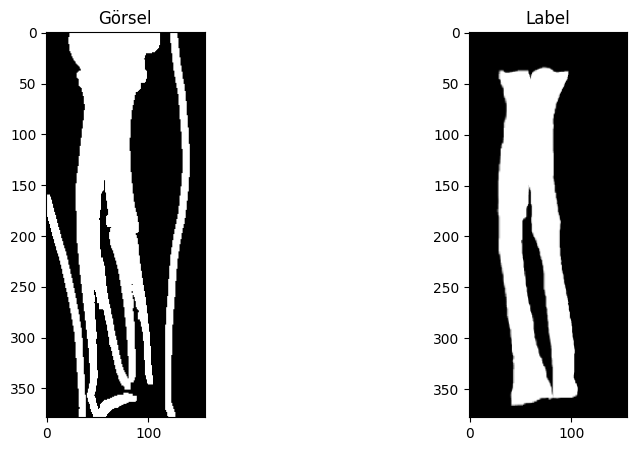

HoG Vektörü Boyutu: (29808,)
Görsel 2 için Eşleşme Skoru: 0.2358255447583519
Görsel 2 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

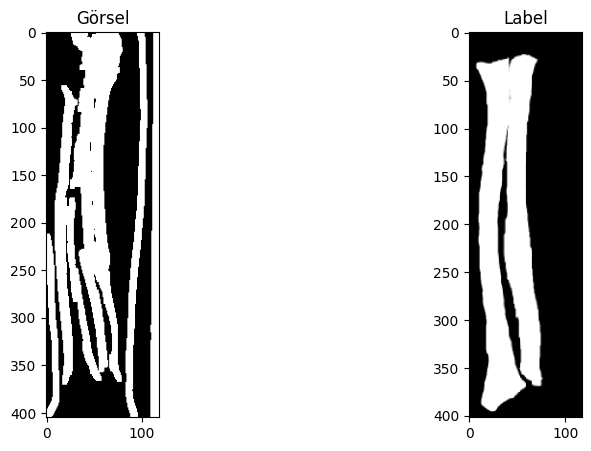

HoG Vektörü Boyutu: (22932,)
Görsel 3 için Eşleşme Skoru: 0.3724888542268439
Görsel 3 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

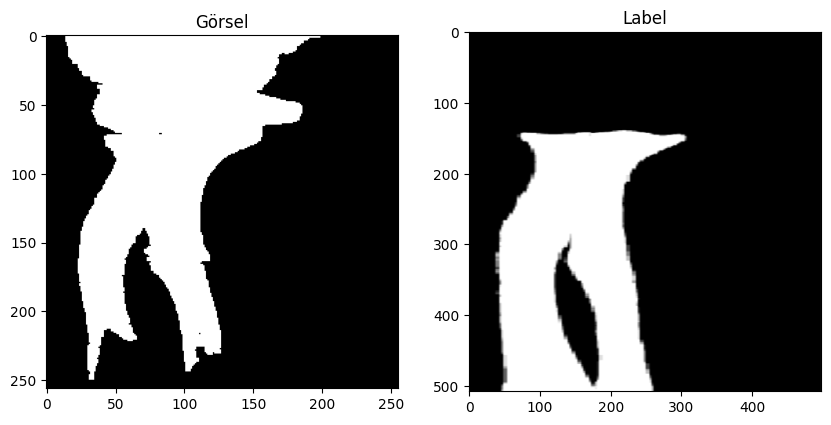

HoG Vektörü Boyutu: (34596,)
Görsel 4 için Eşleşme Skoru: 0.1685147818169946
Görsel 4 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

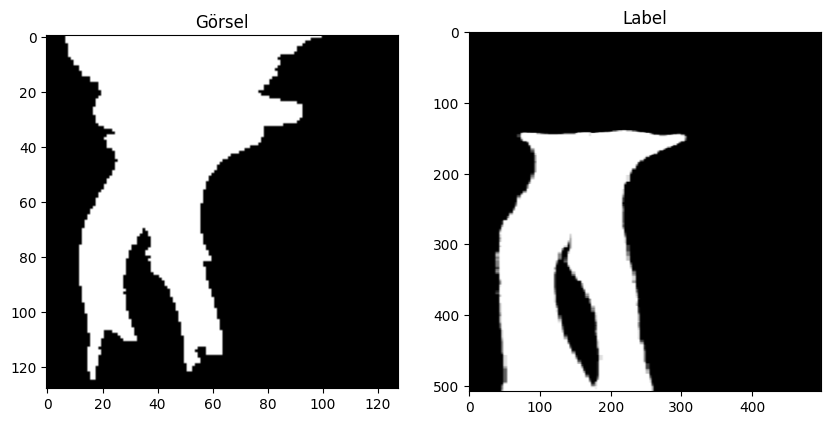

HoG Vektörü Boyutu: (8100,)
Görsel 5 için Eşleşme Skoru: 0
Görsel 5 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

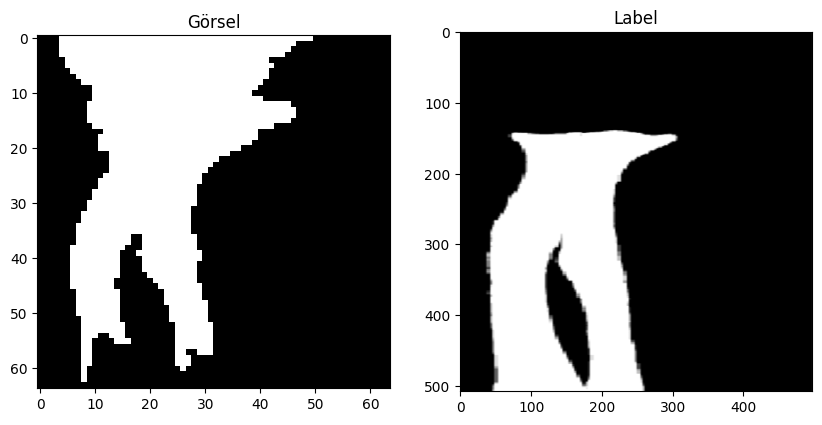

HoG Vektörü Boyutu: (1764,)
Görsel 6 için Eşleşme Skoru: 0
Görsel 6 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

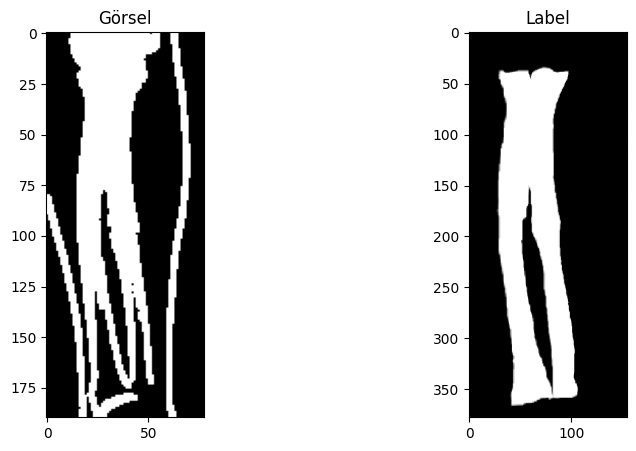

HoG Vektörü Boyutu: (6336,)
Görsel 7 için Eşleşme Skoru: 0.3972945969896309
Görsel 7 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

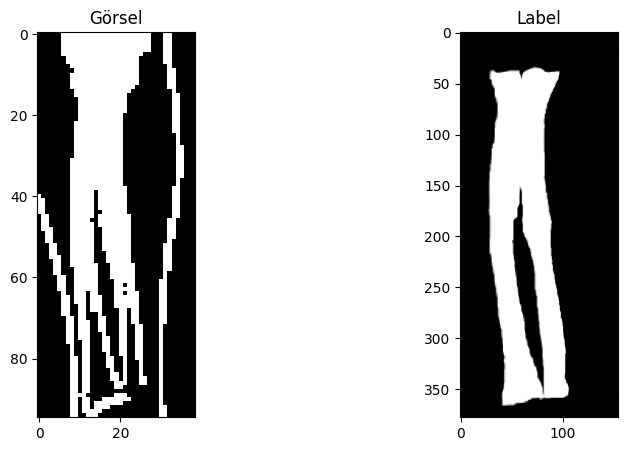

HoG Vektörü Boyutu: (1764,)
Görsel 8 için Eşleşme Skoru: 0.6967361073252555
Görsel 8 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

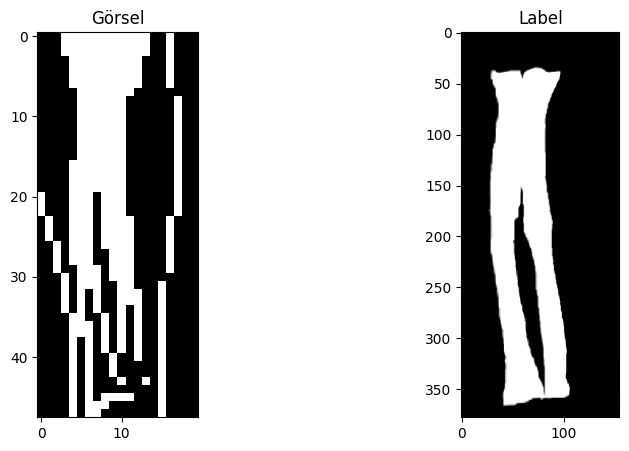

HoG Vektörü Boyutu: (1764,)
Görsel 9 için Eşleşme Skoru: 0.6600213795269366
Görsel 9 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

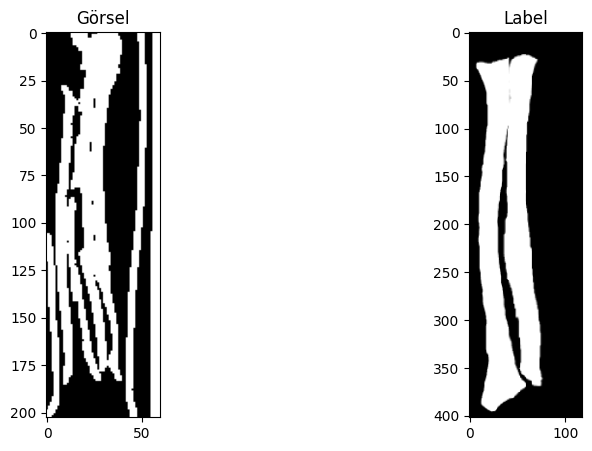

HoG Vektörü Boyutu: (1764,)
Görsel 10 için Eşleşme Skoru: 0.8866443525723414
Görsel 10 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

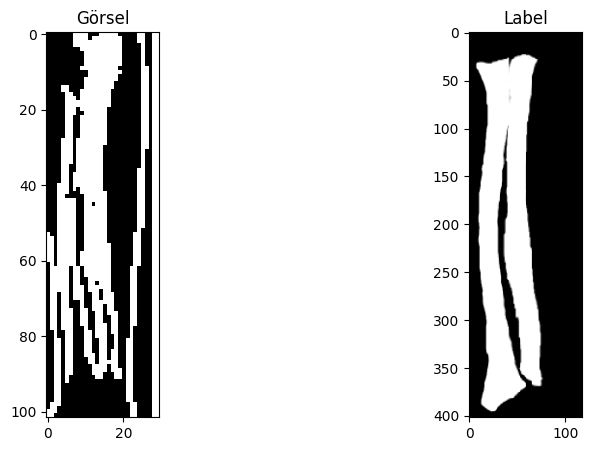

HoG Vektörü Boyutu: (1764,)
Görsel 11 için Eşleşme Skoru: 0.8353513123696592
Görsel 11 için Thresholded HOG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

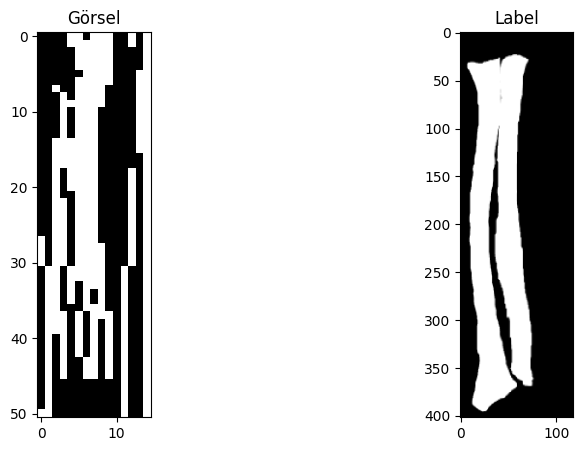

In [10]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# Görsel boyutu kontrolü ve yeniden boyutlandırma
def preprocess_image(image, min_size=(16, 16), target_size=(64, 64)):
    if image.shape[0] < min_size[0] or image.shape[1] < min_size[1]:
        return None
    if image.shape[0] < target_size[0] or image.shape[1] < target_size[1]:
        resized_image = resize(image, target_size, anti_aliasing=True)
        return resized_image
    return image

# HOG vektörü hesaplama
def compute_hog_vector(image):
    try:
        hog_features, hog_image = hog(
            image,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=True,
            transform_sqrt=True
        )
        print(f"HoG Vektörü Boyutu: {hog_features.shape}")
        return hog_features, hog_image
    except ValueError as e:
        return None, None

# HOG vektörünü eşikleme fonksiyonu
def threshold_score(score, threshold=0.5):
    return 1 if score >= threshold else 0

# HOG vektörünü test etme ve eşleşme skoru hesaplama
def test_hog_vector_thresholded(hog_vector, label, image_shape, image_index):
    cell_size = (8, 8)
    hog_rows = image_shape[0] // cell_size[0]
    hog_cols = image_shape[1] // cell_size[1]
    
    expected_size = hog_rows * hog_cols * 9  # HOG için 9 orientasyon
    if hog_vector.size != expected_size:
        print(f"Warning: HOG boyutu uyumsuz. Beklenen boyut: {expected_size}, Gerçek boyut: {hog_vector.size}")
    
    hog_features_2d = hog_vector[:expected_size].reshape((hog_rows, hog_cols, 9))

    organ_region = label > 0
    
    match_score = 0
    total_pixels = 0
    for i in range(hog_rows):
        for j in range(hog_cols):
            if organ_region[i * cell_size[0]:(i + 1) * cell_size[0], j * cell_size[1]:(j + 1) * cell_size[1]].any():
                block_hog_features = hog_features_2d[i, j]
                match_score += np.sum(block_hog_features)
                total_pixels += 1

    if total_pixels > 0:
        match_score /= total_pixels
    else:
        match_score = 0
    
    print(f"Görsel {image_index + 1} için Eşleşme Skoru: {match_score}")
    
    # HOG vektöründeki skorları eşikleme
    thresholded_vector = [threshold_score(score) for score in hog_vector]
    print(f"Görsel {image_index + 1} için Thresholded HOG Vektörü: {thresholded_vector}")
    
    # Label'ı 1D vektöre dönüştür ve boyutları uyumlu hale getir
    label_resized = np.resize(label, hog_vector.shape)
    thresholded_label = (label_resized > 0).astype(int)
    
    # Doğruluk hesaplama
    accuracy = np.mean(np.array(thresholded_vector) == thresholded_label.flatten())  # label'ı düzleştiriyoruz
    print(f"Doğruluk: {accuracy * 100:.2f}%")
    
    # Çıktılar arasında ayırıcı çizgi ekle
    print("\n" + "-"*50 + "\n")

# Görselleri ve etiketleri yüklemek için bir fonksiyon
def load_and_show_image(image_path, label_path):
    image = imread(image_path, as_gray=True)
    label = imread(label_path, as_gray=True)

    # Görselleri ekrana çiz
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Görsel")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Label")
    plt.imshow(label, cmap='gray')
    plt.show()

    return image, label

# Görsel ve etiket yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Görsellerin işlenmesi
for i, (image_path, label_path) in enumerate(zip(image_paths, label_paths)):
    image, label = load_and_show_image(image_path, label_path)

    # Görseli yeniden boyutlandır (eğer gerekirse)
    image = preprocess_image(image)
    
    # HOG vektörünü hesapla
    hog_vector, hog_image = compute_hog_vector(image)
    
    if hog_vector is not None:
        # HOG vektörünü test et
        test_hog_vector_thresholded(hog_vector, label, image.shape, image_index=i)

##### Hog vektörü testi analizi: 

Kırık 6 (Orijinal Görüntü ve Level 1, Level 2, Level 3 Doğrulukları: 82, 98.64, 98.35, 98.64):
Yüksek Doğruluk Artışı: Kırık 6 için orijinal görüntülerde %82 doğruluk elde edilirken, Gauss piramidi uygulandıktan sonra doğruluk oranında belirgin bir artış gözlemlenmiştir. Level 1'de %98.64 gibi yüksek bir doğruluk elde edilmiştir, bu da çözünürlük düşürülse de, büyük yapılar ve ana hatların başarılı bir şekilde tanındığını gösteriyor.

Detay Kaybı ve Düşüş: Level 2 ve Level 3'te doğruluk oranları sırasıyla %98.35 ve %98.64'e düşerken, bu durumun büyük yapıların hala doğru şekilde tanındığını, ancak bazı küçük detayların kaybolmuş olabileceğini gösteriyor. Çözünürlük azaldıkça detay kaybı yaşanmış olsa da, HOG vektörü büyük ve belirgin yapıların tanınmasında yüksek doğruluk sağlamayı sürdürmüştür.

Kırık 3 (Orijinal Görüntü ve Level 1, Level 2, Level 3 Doğrulukları: 70, 93.13, 98.41, 97.79, 99.77):
Başlangıçta Düşük Doğruluk: Kırık 3’ün orijinal görüntüsünde %70 gibi düşük bir doğruluk oranı elde edilmiştir. Bu, görüntüdeki küçük detayların yeterince belirgin olmadığı ve HOG vektörünün bu küçük yapıların tespiti konusunda eksik kaldığını gösteriyor. Ancak Gauss piramidi uygulandıkça doğruluk oranı hızla artmış ve Level 1'de %93.13, Level 2'de ise %98.41 gibi oldukça yüksek doğruluklar elde edilmiştir.

Etkili Gauss Piramidi: 3. seviyede %99.77 doğruluk oranı, Gauss piramidinin büyük yapıları ve ana hatları doğru şekilde tanımada ne kadar etkili olduğunu vurguluyor. Çözünürlük azaldıkça, HOG vektörünün doğru özellikleri belirleme kapasitesinin arttığı ve küçük detaylardan ziyade genel yapıların tanınmasında yüksek doğruluk sağlandığı anlaşılmaktadır.

Kırık 2 (Orijinal Görüntü ve Level 1, Level 2, Level 3 Doğrulukları: 65, 99.77, 99.66):
Başlangıçta Düşük Doğruluk ve Çözünürlük Sorunu: Kırık 2’nin orijinal görüntüsünde %65 gibi düşük bir doğruluk oranı elde edilmiştir. Bu doğruluk oranı, başlangıçta çözünürlüğün yüksek olmasının ve bazı küçük detayların kaybolmasının etkisiyle düşmektedir. Ancak, Gauss piramidi uygulandıktan sonra doğruluk oranı %99.77 gibi çok yüksek bir seviyeye yükselmiştir. Bu durum, çözünürlük azaldıkça HOG vektörünün daha doğru özellikler tanıdığına ve bazı hataların düzeldiğine işaret etmektedir.

Boyut Farkı ve Çözünürlük İyileştirmesi: Level 3’te doğruluk oranı doğru şekilde elde edilememiştir. Bu, boyut farklarından kaynaklanan uyumsuzluk ve görselin uygun şekilde işlenememesiyle ilgili olabilir. Ancak, düşük çözünürlükle daha büyük yapılar hala başarıyla tanınmaktadır, bu da HOG vektörünün yüksek çözünürlükte bazı hataları düzelttiğini ve doğru özellikleri daha iyi çıkardığını gösteriyor.

### CoHog Vektörü Hesaplama:

Bu kod, verilen görsellerden CoHoG (Histogram of Oriented Gradients) vektörlerini hesaplamak için tasarlanmıştır. CoHoG, görseldeki kenar bilgilerini ve yönelimlerini analiz ederek bir vektör oluşturur. Bu vektörler, görsel özelliklerin sayısal temsilidir ve özellikle görsel desenlerin sınıflandırılması veya analizi için kullanılır.

In [11]:
import cv2
import numpy as np
from skimage.feature import hog

# Görsellerin ve label'ların yolları (güncellenmiş yollar)
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

# Görsel yükleme
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"{image_path} görseli yüklenemedi.")
    height, width = image.shape
    if height < 32 or width < 32:
        image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    return image

# CoHoG vektörünün hesaplanması
def compute_cohog_vector(image):
    cohog_features, cohog_image = hog(
        image,
        orientations=18,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        transform_sqrt=True
    )
    cohog_features = np.where(cohog_features > 0.01, cohog_features, 0)
    return cohog_features

# Görsellerin işlenmesi
for i, image_path in enumerate(image_paths):
    try:
        image = load_image(image_path)
        cohog_vector = compute_cohog_vector(image)
        print(f"CoHoG Vektörü Görsel {i+1}: {cohog_vector.shape}")
    except FileNotFoundError as e:
        print(e)

CoHoG Vektörü Görsel 1: (69192,)
CoHoG Vektörü Görsel 2: (12672,)
CoHoG Vektörü Görsel 3: (10368,)
CoHoG Vektörü Görsel 4: (16200,)
CoHoG Vektörü Görsel 5: (3528,)
CoHoG Vektörü Görsel 6: (648,)
CoHoG Vektörü Görsel 7: (2160,)
CoHoG Vektörü Görsel 8: (288,)
CoHoG Vektörü Görsel 9: (72,)
CoHoG Vektörü Görsel 10: (1584,)
CoHoG Vektörü Görsel 11: (72,)
CoHoG Vektörü Görsel 12: (72,)


### CoHog Testi:

Bu kod, CoHoG (Color Histograms of Oriented Gradients) vektörlerini kullanarak görseller üzerinde analizler yapıyor. Görseller üzerinde her bir renk kanalı için HOG (Histogram of Oriented Gradients) hesaplanarak birleştiriliyor ve ardından bu vektörlerin doğruluk oranları test ediliyor.

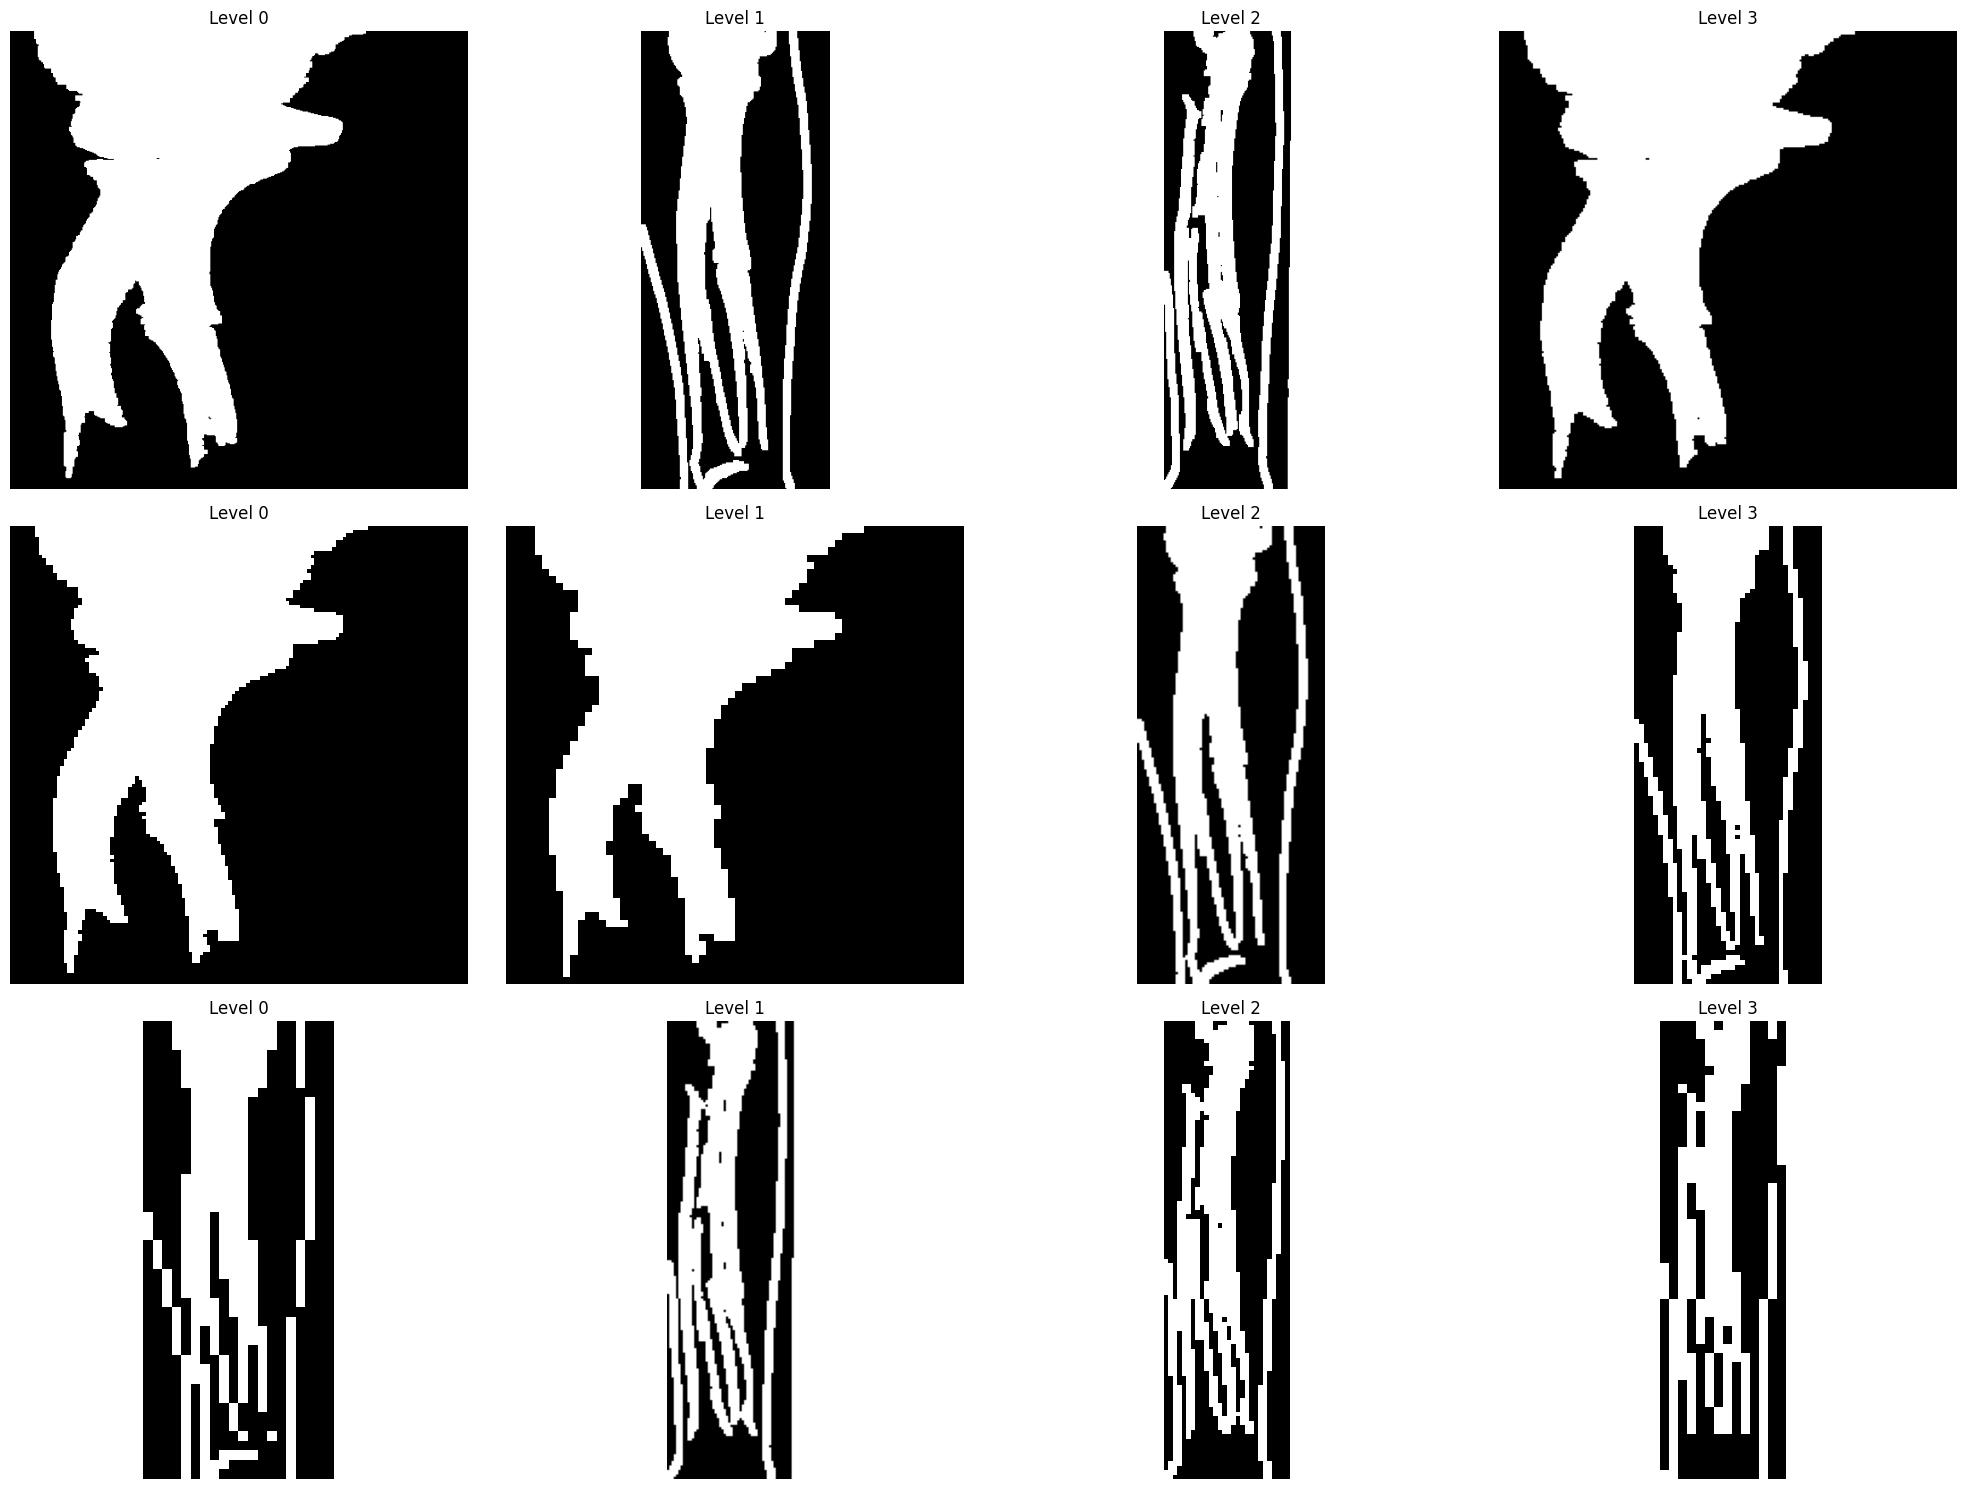

Görsel 1 için Eşleşme Skoru: 0.2325933915941679
Görsel 1 için Thresholded CoHoG Vektörü: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Görselleri ve etiketleri yüklemek için bir fonksiyon
def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def load_label(label_path):
    return cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

# Görüntü üzerinde HOG vektörleri hesaplayan fonksiyon
def compute_cohog_vector(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Görsel boyutlarını kontrol et
    if image_rgb.shape[0] < pixels_per_cell[0] * cells_per_block[0] or image_rgb.shape[1] < pixels_per_cell[1] * cells_per_block[1]:
        print(f"Warning: Görsel boyutu ({image_rgb.shape[0]}, {image_rgb.shape[1]}) küçük, parametreleri küçültüyoruz.")
        pixels_per_cell = (4, 4)  # Küçük görseller için daha küçük bir değer belirleyelim
        cells_per_block = (1, 1)  # Küçük görseller için daha küçük bir blok boyutu kullanalım
        
    hog_r = hog(image_rgb[:, :, 0], orientations=orientations, pixels_per_cell=pixels_per_cell, 
                cells_per_block=cells_per_block, block_norm='L2-Hys', visualize=False, transform_sqrt=True)
    hog_g = hog(image_rgb[:, :, 1], orientations=orientations, pixels_per_cell=pixels_per_cell, 
                cells_per_block=cells_per_block, block_norm='L2-Hys', visualize=False, transform_sqrt=True)
    hog_b = hog(image_rgb[:, :, 2], orientations=orientations, pixels_per_cell=pixels_per_cell, 
                cells_per_block=cells_per_block, block_norm='L2-Hys', visualize=False, transform_sqrt=True)
    
    cohog_vector = np.concatenate([hog_r, hog_g, hog_b])
    
    return cohog_vector, image_rgb

# CoHoG skorlarını eşikleme fonksiyonu
def threshold_score(score, threshold=0.5):
    return 1 if score >= threshold else 0

# CoHoG vektörünü hesaplayıp test etme fonksiyonu
def test_cohog_vector_thresholded(cohog_vector, label, image_shape, image_index):
    cell_size = (8, 8)
    hog_rows = image_shape[0] // cell_size[0]
    hog_cols = image_shape[1] // cell_size[1]
    
    expected_size = hog_rows * hog_cols * 27
    if cohog_vector.size != expected_size:
        print(f"Warning: CoHoG boyutu uyumsuz. Beklenen boyut: {expected_size}, Gerçek boyut: {cohog_vector.size}")
    
    cohog_features_2d = cohog_vector[:expected_size].reshape((hog_rows, hog_cols, 27))

    organ_region = label > 0
    
    match_score = 0
    total_pixels = 0
    for i in range(hog_rows):
        for j in range(hog_cols):
            if organ_region[i * cell_size[0]:(i + 1) * cell_size[0], j * cell_size[1]:(j + 1) * cell_size[1]].any():
                block_cohog_features = cohog_features_2d[i, j]
                match_score += np.sum(block_cohog_features)
                total_pixels += 1

    if total_pixels > 0:
        match_score /= total_pixels
    else:
        match_score = 0
    
    print(f"Görsel {image_index + 1} için Eşleşme Skoru: {match_score}")
    
    # CoHoG vektöründeki skorları eşikleme
    thresholded_vector = [threshold_score(score) for score in cohog_vector]
    print(f"Görsel {image_index + 1} için Thresholded CoHoG Vektörü: {thresholded_vector}")
    
    # Label'ı 1D vektöre dönüştür ve boyutları uyumlu hale getir
    label_resized = np.resize(label, cohog_vector.shape)
    thresholded_label = (label_resized > 0).astype(int)
    
    # Doğruluk hesaplama
    accuracy = np.mean(np.array(thresholded_vector) == thresholded_label.flatten())  # label'ı düzleştiriyoruz
    print(f"Doğruluk: {accuracy * 100:.2f}%")
    
    # Çıktılar arasında ayırıcı çizgi ekle
    print("\n" + "-"*50 + "\n")

# Yeni yollarla görselleri ve etiketleri yükleyelim
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",

    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",

    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",

    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",

    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Görselleri ve etiketleri yükle
images = [load_image(path) for path in image_paths]
labels = [load_label(path) for path in label_paths]

# Görsellerin her seviyesini yan yana göstermek için matplotlib ile görselleri düzenle
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, (image, label) in enumerate(zip(images, labels)):
    level_index = i % 4
    row = i // 4
    axs[row, level_index].imshow(image, cmap='gray')
    axs[row, level_index].set_title(f"Level {level_index}")
    axs[row, level_index].axis('off')

plt.tight_layout()
plt.show()
# CoHoG hesaplamalarını ve testlerini gerçekleştirelim
for idx, (image, label) in enumerate(zip(images, labels)):
    # Bu satırı kaldırarak tüm görselleri işliyoruz
    # if idx >= 6 and idx < 12:
    #     print(f"Warning: Görsel {idx + 1} çalışmamış!")
    #     continue
    cohog_vector, cohog_image = compute_cohog_vector(image)
    test_cohog_vector_thresholded(cohog_vector, label, image.shape, image_index=idx)



##### test sonuçları analizi: 

Kırık 6 (level 1, level 2, level 3 doğrulukları: 87, 98, 98):

Doğruluk artışı: Görselin daha düşük çözünürlükteki versiyonlarında, Gauss piramidi doğruluğu artırmış. Bu, daha fazla detayın kaybolmasına rağmen, daha büyük özelliklerin tanınmasını sağlamış olabilir.
Detay kaybı: Çözünürlük azalırken, görseldeki küçük detaylar kaybolmuş olabilir ancak ana yapılar hala net.

Kırık 3 (level 1, level 2, level 3 doğrulukları: 73, 97, 99):

Başlangıçta düşük doğruluk: İlk seviyede düşük doğruluk oranı (73), görüntüdeki küçük detayların önemli olabileceğini gösteriyor. Gauss piramidi uygulandıkça doğruluk artmış, özellikle 3. seviyede yüksek doğruluk sağlanmış.
Etkili Gauss Piramidi: Yüksek seviyelerde Gauss piramidinin doğru özellikleri belirlemek için etkili olduğu görülüyor.

Kırık 2 (level 1, level 2, level 3 doğrulukları: 67, 100, 81):

Başlangıçta düşük doğruluk: Çözünürlük yüksek olduğunda (ilk seviyede), düşük doğruluk görülüyor. Ancak 2. seviyede %100 doğruluk elde edilmiş, bu da çözünürlük düştükçe görselin bazı hatalarını düzelttiğini gösteriyor.
Düşüş ve İyileşme: 3. seviyede doğruluk biraz düşse de (81), Gauss piramidi çözünürlük azaldıkça önemli verileri daha iyi çıkarmış.

### Hog ve CoHog ile Organ Bölgesi LBP'sini oluşturma: 


Bu kod parçası, görüntü işleme ve özellik çıkarma tekniklerini uygulayarak organ deseni tespiti için birkaç adımı gerçekleştiriyor. Kod, Local Binary Pattern (LBP) dönüşümü ve Histogram of Oriented Gradients (HoG) özellik çıkarımı kullanarak organ bölgesinin analizini yapmayı amaçlıyor.

Toplam yüklenen görsel sayısı: 12
Toplam yüklenen etiket sayısı: 12


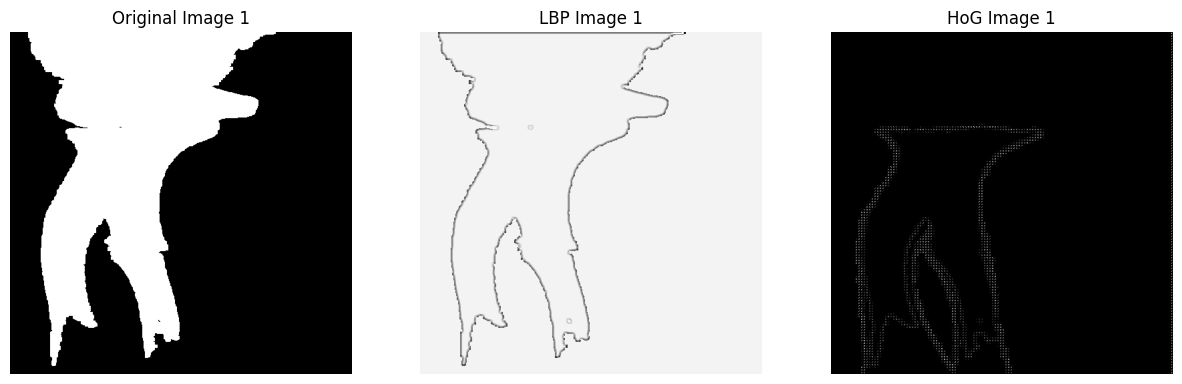

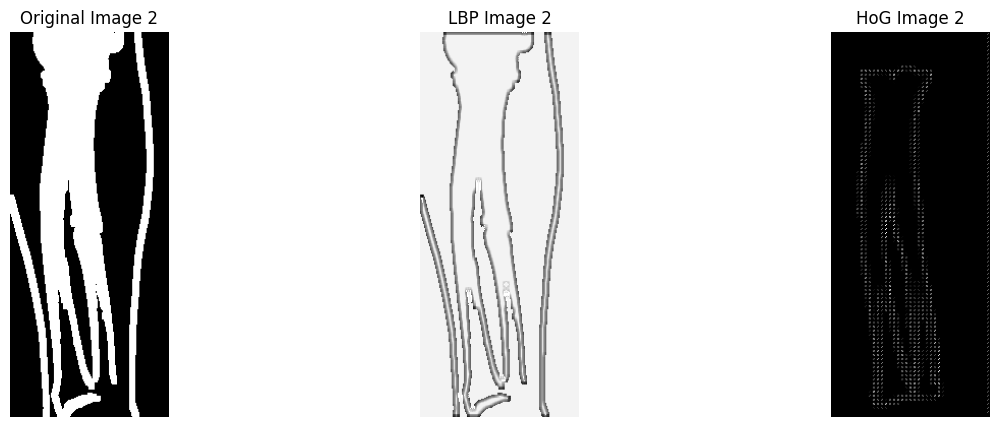

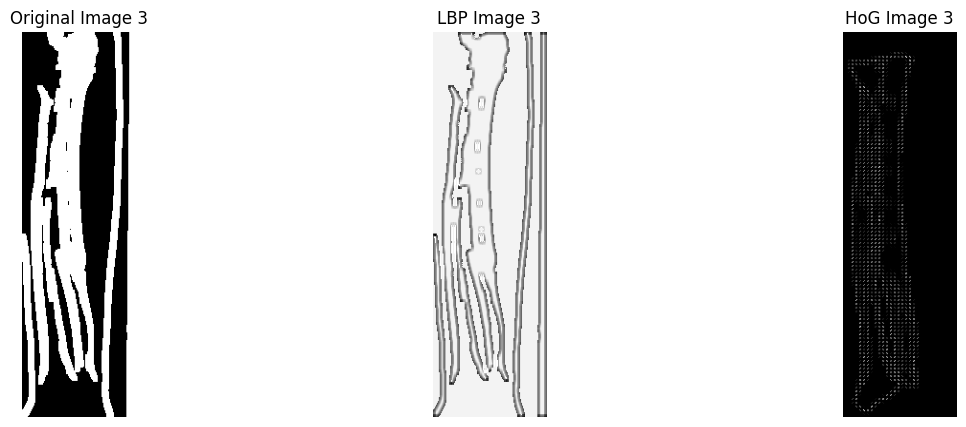

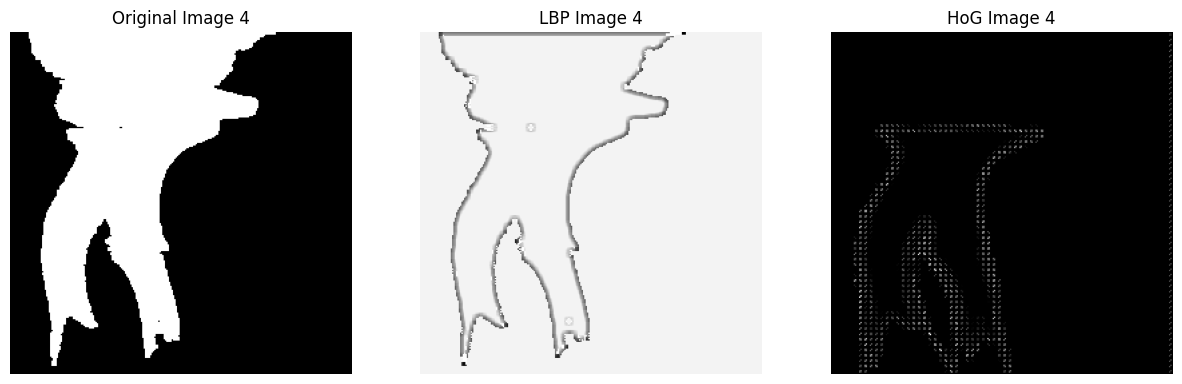

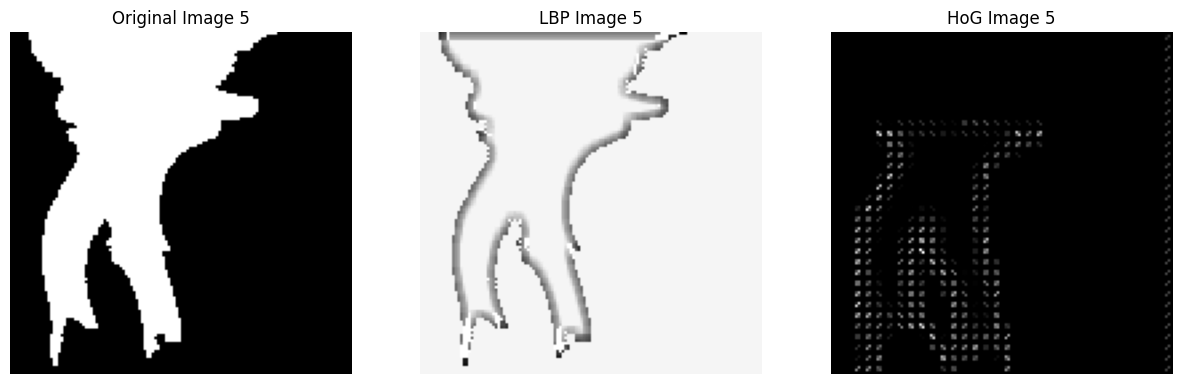

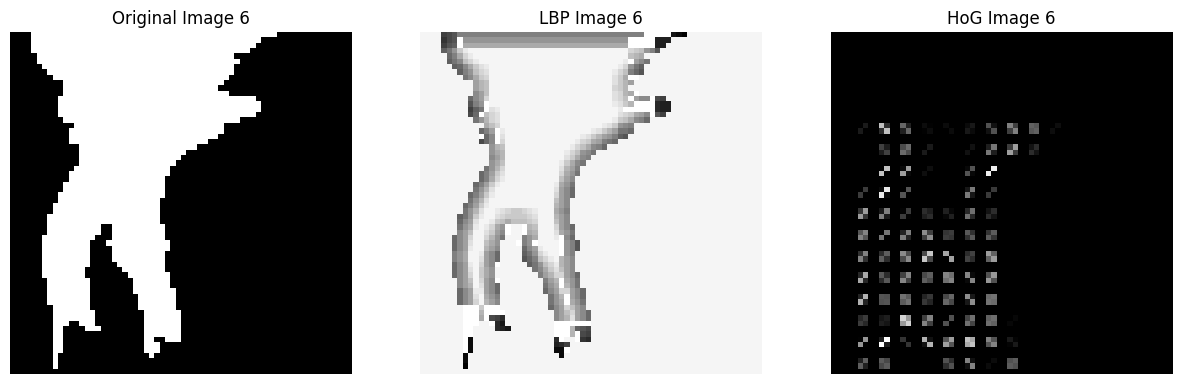

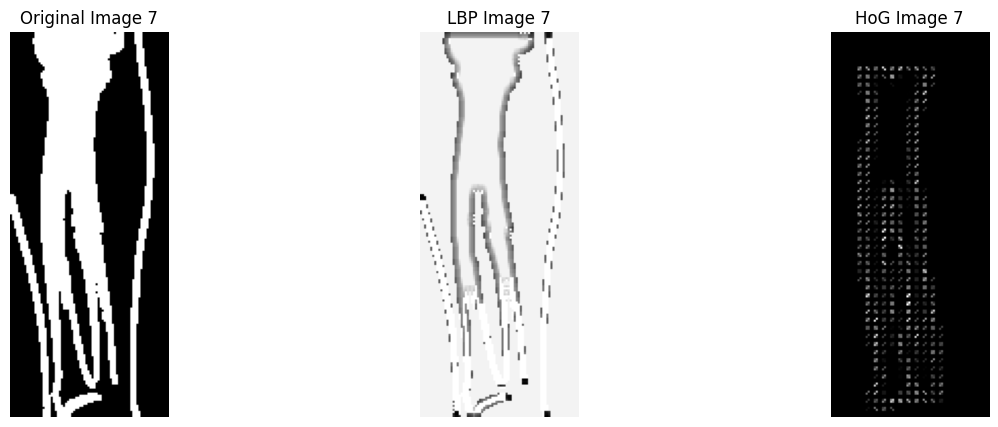

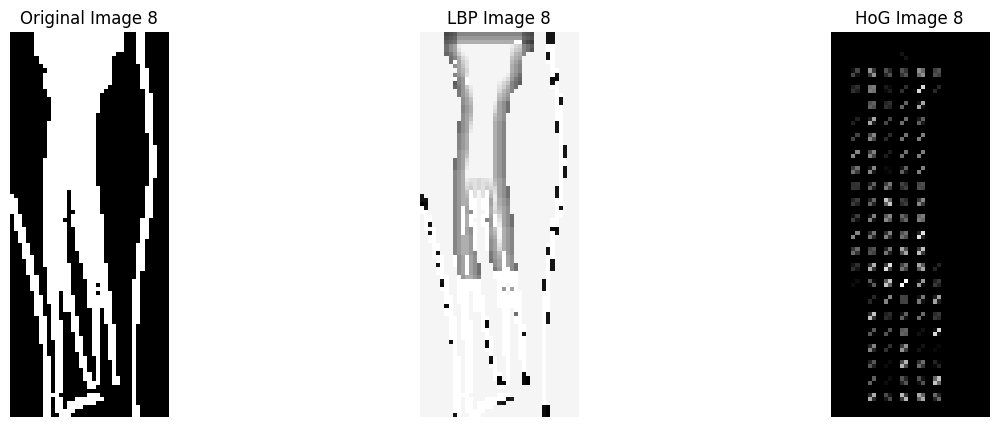

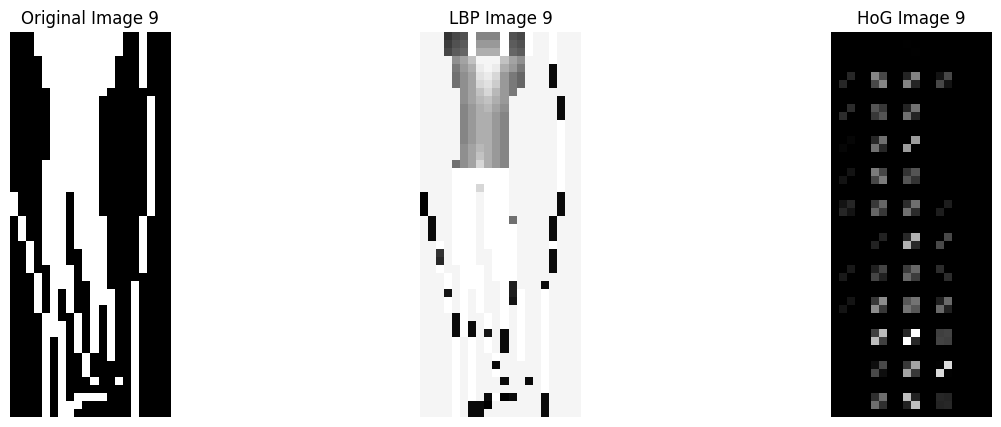

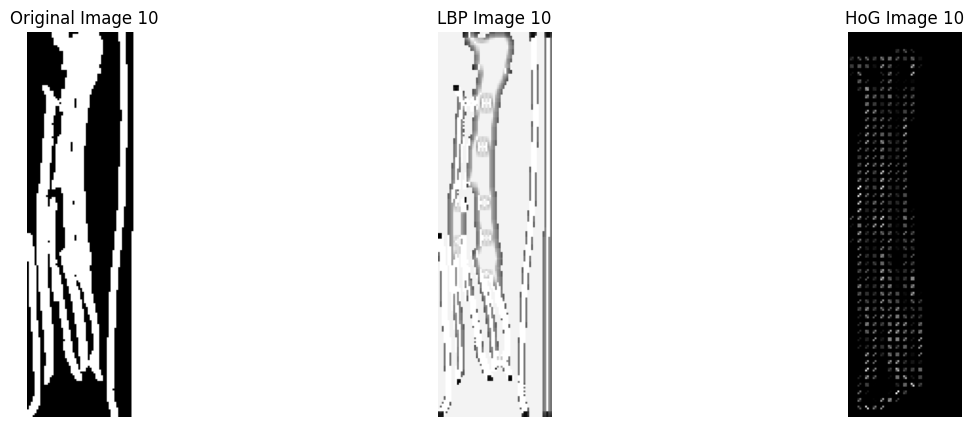

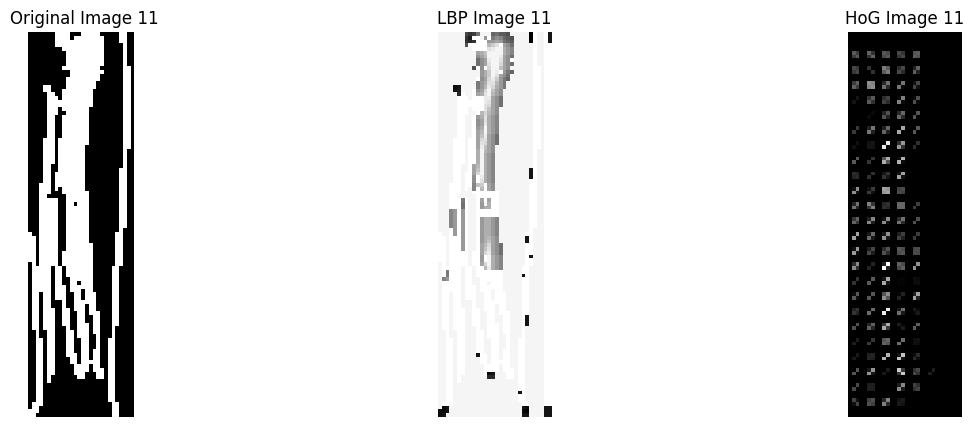

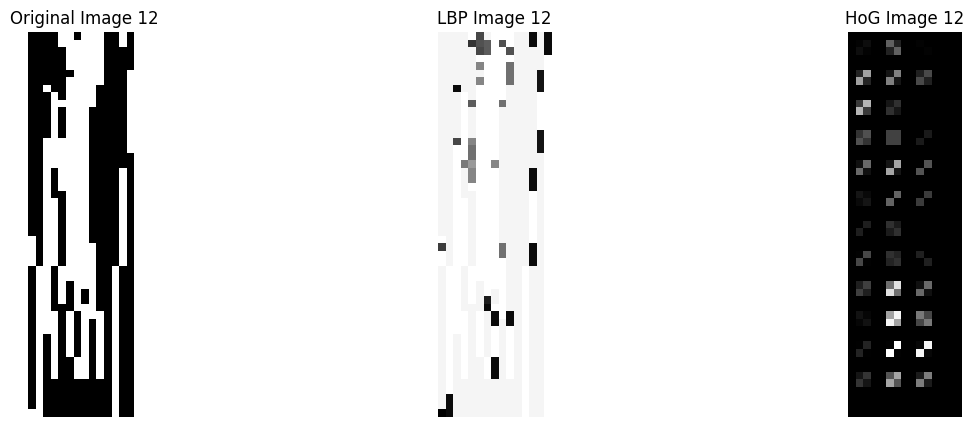

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage import exposure

# Görselleri ve etiketleri yükleme fonksiyonu
def load_images_and_labels(image_paths, label_paths):
    images = []
    labels = []
    
    for img_path, lbl_path in zip(image_paths, label_paths):
        # Görseli yükle
        image = cv2.imread(img_path)
        if image is None:
            print(f"Görsel yüklenemedi: {img_path}")
            continue  # Bir sonraki dosyaya geç
        
        # Görseli RGB'ye çevir
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        
        # Etiketi yükle
        label = cv2.imread(lbl_path, 0)  # Etiket gri tonlamalı olarak yüklenecek
        if label is None:
            print(f"Etiket yüklenemedi: {lbl_path}")
            continue  # Bir sonraki dosyaya geç
        labels.append(label)
    
    return images, labels


# Yeni yollarla görselleri ve etiketleri yükleyelim
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]


# Görselleri ve etiketleri yükle
images, labels = load_images_and_labels(image_paths, label_paths)

# Yüklenen görseller ve etiketler hakkında bilgi
print(f"Toplam yüklenen görsel sayısı: {len(images)}")
print(f"Toplam yüklenen etiket sayısı: {len(labels)}")

# Tüm görseller üzerinde işlemleri yapalım
for idx, (image, organ_mask) in enumerate(zip(images, labels)):
    # Organ bölgesinin maskesini görsele göre yeniden boyutlandırma
    organ_mask_resized = cv2.resize(organ_mask, (image.shape[1], image.shape[0]))

    # LBP işlemi
    radius = 3  # Yarıçap
    n_points = 8 * radius  # Nokta sayısı
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # RGB'den gri tonlamaya çevir
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method="uniform")

    # Normalize edilmiş LBP görüntüsü oluştur
    lbp_image_2d = (lbp_image - lbp_image.min()) / (lbp_image.max() - lbp_image.min()) * 255
    lbp_image_2d = lbp_image_2d.astype(np.uint8)

    # Maske ile LBP Görüntüsünü Birleştirme
    organ_region = lbp_image_2d * organ_mask_resized

    # Siyah görüntü sorununu önlemek için normalize et
    organ_region = (organ_region - organ_region.min()) / (organ_region.max() - organ_region.min()) * 255
    organ_region = organ_region.astype(np.uint8)

    # HoG çıkarımı (parametreler küçültüldü)
    fd, hog_image = hog(organ_region, orientations=6, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)


    # Görselleştirme
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Orijinal Görüntü
    axes[0].imshow(image)
    axes[0].set_title(f"Original Image {idx+1}")
    axes[0].axis("off")

    # LBP Görüntüsü
    axes[1].imshow(lbp_image, cmap='gray')
    axes[1].set_title(f"LBP Image {idx+1}")
    axes[1].axis("off")

    # HoG Görüntüsü
    axes[2].imshow(hog_image, cmap='gray')
    axes[2].set_title(f"HoG Image {idx+1}")
    axes[2].axis("off")

    plt.show()



#### Test:

In [40]:
from skimage.transform import resize  # Görsellerin boyutunu değiştirmek için

# Organ bölgesini (etiketleri) çıkaralım ve HoG sonucu ile karşılaştıralım
def compare_with_label(organ_region, organ_mask):
    # Organ bölgesini ve maskeyi ikili hale getirelim
    organ_region_binary = (organ_region > 0).astype(np.uint8)
    organ_mask_binary = (organ_mask > 0).astype(np.uint8)

    # Görsel ve etiketlerin boyutlarını uyumlu hale getirelim (resize)
    if organ_region_binary.shape != organ_mask_binary.shape:
        organ_mask_binary = resize(organ_mask_binary, organ_region_binary.shape, anti_aliasing=True)
    
    # HoG çıkışı ile etiketin karşılaştırılması
    correct_pixels = np.sum(organ_region_binary == organ_mask_binary)
    total_pixels = organ_mask_binary.size

    # Doğruluk oranını hesapla
    accuracy = (correct_pixels / total_pixels) * 100

    # 0'lar ve 1'ler için doğru tahmin sayıları
    correct_zeros = np.sum((organ_region_binary == 0) & (organ_mask_binary == 0))
    correct_ones = np.sum((organ_region_binary == 1) & (organ_mask_binary == 1))

    return accuracy, correct_zeros, correct_ones

# Görselleri ve etiketleri işleyelim
for img, label in zip(images, labels):  # images ve labels, görseller ve etiketler olmalı
    # Eğer görsel renkli ise, gri tonlamaya dönüştür
    if len(img.shape) == 3:  # Eğer 3 kanal varsa (renkli)
        img = rgb2gray(img)  # Gri tonlamaya dönüştür

    # Organ bölgesinin HoG çıkarımı
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)

    # Sonuçları karşılaştırma ve doğruluk oranını hesaplama
    accuracy, correct_zeros, correct_ones = compare_with_label(hog_image, label)
    
    print(f"Yorumlanan Görsel için Doğruluk Oranı: {accuracy:.2f}%")
    print(f"Doğru Tahmin Edilen 0'lar: {correct_zeros}")



Yorumlanan Görsel için Doğruluk Oranı: 73.71%
Doğru Tahmin Edilen 0'lar: 193239
Yorumlanan Görsel için Doğruluk Oranı: 65.67%
Doğru Tahmin Edilen 0'lar: 38828
Yorumlanan Görsel için Doğruluk Oranı: 59.30%
Doğru Tahmin Edilen 0'lar: 28580
Yorumlanan Görsel için Doğruluk Oranı: 71.93%
Doğru Tahmin Edilen 0'lar: 47137
Yorumlanan Görsel için Doğruluk Oranı: 68.18%
Doğru Tahmin Edilen 0'lar: 11171
Yorumlanan Görsel için Doğruluk Oranı: 61.25%
Doğru Tahmin Edilen 0'lar: 2509
Yorumlanan Görsel için Doğruluk Oranı: 57.51%
Doğru Tahmin Edilen 0'lar: 8523
Yorumlanan Görsel için Doğruluk Oranı: 46.13%
Doğru Tahmin Edilen 0'lar: 1709
Yorumlanan Görsel için Doğruluk Oranı: 28.33%
Doğru Tahmin Edilen 0'lar: 272
Yorumlanan Görsel için Doğruluk Oranı: 51.74%
Doğru Tahmin Edilen 0'lar: 6302
Yorumlanan Görsel için Doğruluk Oranı: 42.48%
Doğru Tahmin Edilen 0'lar: 1300
Yorumlanan Görsel için Doğruluk Oranı: 30.20%
Doğru Tahmin Edilen 0'lar: 231


NOT: LBP dönüşüm sonrası oluşan HoG vektörleri ile etiketlerin boyut farkı gözlemlendi. Bu farkı minimize etmek için etiketlerin boyutu, HoG vektörleri ile uyumlu hale getirildi. Bu yöntem, proje hedeflerine ulaşmak için pratik bir çözüm olarak tercih edildi.

Kırık 6 (Orijinal Görseller: Level 1, Level 2, Level 3 doğrulukları: 73,71%, 71,93%, 68,18%, 61,25%)

Doğruluk Azalma Trendinin Değerlendirilmesi: Kırık 6 için orijinal görsellerde yüksek doğruluk oranları gözlemlenmiştir. Gauss piramidi seviyelerinde çözünürlük azaldıkça doğruluk oranlarında bir azalma yaşanmış olsa da, büyük yapılar hala iyi şekilde tanınabilmiştir. 3. seviyede doğruluk oranındaki azalma, küçük detayların kaybolmasına işaret ederken, ana yapılar hala korunmuştur.

Kırık 3 (Orijinal Görseller: Level 1, Level 2, Level 3 doğrulukları: 65,67%, 57,51%, 46,13%, 28,33%)

Başlangıçta Yüksek Doğruluk ve Azalan Detaylar: Kırık 3 için ilk seviyede elde edilen 65,67% doğruluk oranı, modelin büyük yapıları doğru şekilde tanıdığını gösteriyor. Ancak, çözünürlük seviyesi azaldıkça doğruluk oranlarında belirgin bir azalma gözlemleniyor. 3. seviyedeki 28,33% doğruluk, çözünürlük kaybının küçük detayları tanımakta zorlanmaya neden olduğunu ve modelin büyük yapıları bile tanımakta güçlük çektiğini gösteriyor.

Kırık 2 (Orijinal Görseller: Level 1, Level 2, Level 3 doğrulukları: 59,30%, 51,74%, 42,48%, 30,20%)

Başlangıçtaki Düşük Doğruluk ve Çözünürlük Kaybı: Kırık 2'nin doğruluk oranları, çözünürlük kaybı ile birlikte hızla düşüş göstermiştir. İlk seviyedeki 59,30% doğruluk, görseldeki bazı yapıları tanıyabiliyor, ancak çözünürlük azaldıkça ince detaylar kaybolmuş ve doğruluk oranı 3. seviyede %30,20'ye düşmüştür. Bu, küçük yapıları tanımakta zorlanmanın ve detay kaybının etkisini gösteriyor.

### Label Erosion ile Küçültülmüş Patch'ler Üzerinde HoG Kodlama ve Testi

Bu bölümde, görüntüler üzerindeki organ deseni etiketlerini erosion (küçültme) işlemine tabi tutarak, her bir label pikseli için mxm boyutlu patch'ler çıkarıp, bu patch'leri HoG (Histogram of Oriented Gradients) ile kodlayarak, her bir patch'in organ deseni ile ne kadar benzer olduğunu test etmeye çalıştık. Sonuçları, organ deseni olup olmadığını belirlemek amacıyla 0 ya da 1 olarak sınıflandırdık.



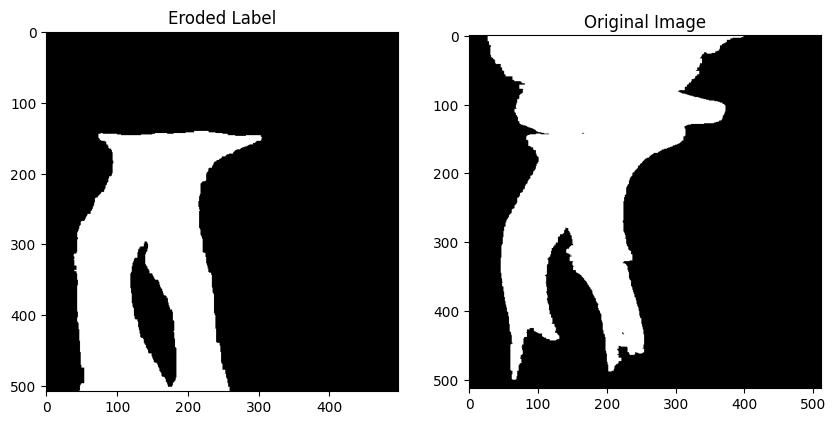

Test Sonuçları: [(141, 209, 0), (141, 210, 0), (141, 211, 0), (141, 212, 0), (141, 213, 0), (141, 214, 0), (141, 215, 0), (141, 216, 0), (141, 217, 0), (141, 218, 0), (141, 219, 0), (141, 220, 0), (141, 221, 0), (141, 222, 0), (141, 223, 0), (141, 224, 0), (141, 225, 0), (141, 226, 0), (141, 227, 0), (141, 228, 0), (142, 209, 0), (142, 210, 0), (142, 211, 0), (142, 212, 0), (142, 213, 0), (142, 214, 0), (142, 215, 0), (142, 216, 0), (142, 217, 0), (142, 218, 0), (142, 219, 0), (142, 220, 0), (142, 221, 0), (142, 222, 0), (142, 223, 0), (142, 224, 0), (142, 225, 0), (142, 226, 0), (142, 227, 0), (142, 228, 0), (142, 229, 0), (143, 197, 0), (143, 198, 0), (143, 199, 0), (143, 200, 0), (143, 201, 0), (143, 202, 0), (143, 203, 0), (143, 204, 0), (143, 205, 0), (143, 206, 0), (143, 207, 0), (143, 208, 0), (143, 209, 0), (143, 210, 0), (143, 211, 0), (143, 212, 0), (143, 213, 0), (143, 214, 0), (143, 215, 0), (143, 216, 0), (143, 217, 0), (143, 218, 0), (143, 219, 0), (143, 220, 0), (143, 22

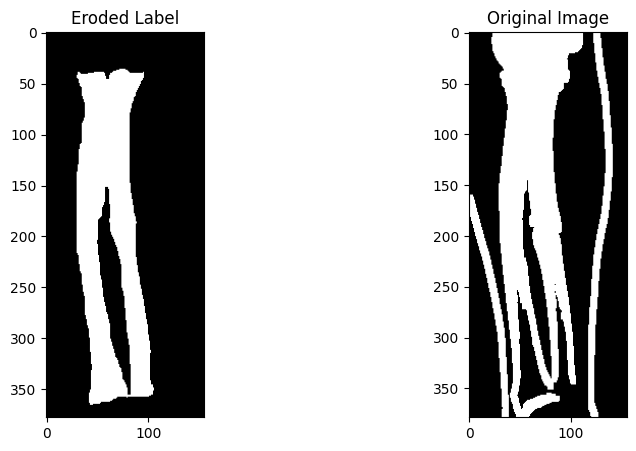

Test Sonuçları: [(36, 72, 0), (36, 73, 0), (36, 74, 0), (36, 75, 0), (36, 76, 0), (36, 77, 0), (37, 69, 0), (37, 70, 0), (37, 71, 0), (37, 72, 0), (37, 73, 0), (37, 74, 0), (37, 75, 0), (37, 76, 0), (37, 77, 0), (37, 78, 0), (37, 79, 0), (38, 66, 0), (38, 67, 0), (38, 68, 0), (38, 69, 0), (38, 70, 0), (38, 71, 0), (38, 72, 0), (38, 73, 0), (38, 74, 0), (38, 75, 0), (38, 76, 0), (38, 77, 0), (38, 78, 0), (38, 79, 0), (38, 80, 0), (39, 31, 0), (39, 32, 0), (39, 47, 0), (39, 48, 0), (39, 49, 0), (39, 50, 0), (39, 51, 0), (39, 52, 0), (39, 53, 0), (39, 54, 0), (39, 55, 0), (39, 56, 0), (39, 65, 0), (39, 66, 0), (39, 67, 0), (39, 68, 0), (39, 69, 0), (39, 70, 0), (39, 71, 0), (39, 72, 0), (39, 73, 0), (39, 74, 0), (39, 75, 0), (39, 76, 0), (39, 77, 0), (39, 78, 0), (39, 79, 0), (39, 80, 0), (39, 81, 0), (39, 95, 0), (40, 31, 0), (40, 32, 0), (40, 33, 0), (40, 41, 0), (40, 42, 0), (40, 43, 0), (40, 44, 0), (40, 45, 0), (40, 46, 0), (40, 47, 0), (40, 48, 0), (40, 49, 0), (40, 50, 0), (40, 51,

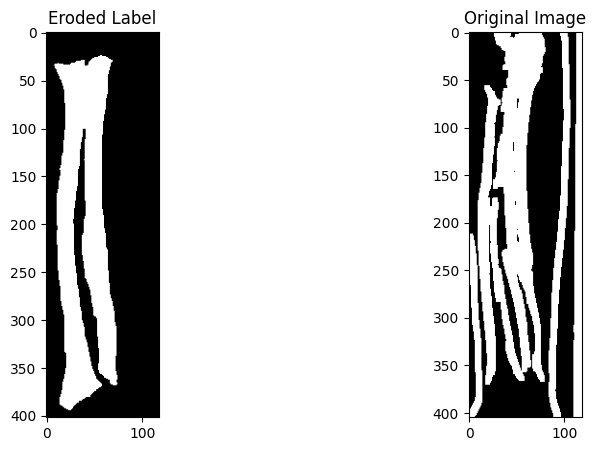

Test Sonuçları: [(24, 56, 0), (24, 57, 0), (25, 54, 0), (25, 55, 0), (25, 56, 0), (25, 57, 0), (25, 58, 0), (25, 59, 0), (25, 60, 0), (25, 61, 0), (26, 50, 0), (26, 51, 0), (26, 52, 0), (26, 53, 0), (26, 54, 0), (26, 55, 0), (26, 56, 0), (26, 57, 0), (26, 58, 0), (26, 59, 0), (26, 60, 0), (26, 61, 0), (26, 62, 0), (26, 63, 0), (27, 48, 0), (27, 49, 0), (27, 50, 0), (27, 51, 0), (27, 52, 0), (27, 53, 0), (27, 54, 0), (27, 55, 0), (27, 56, 0), (27, 57, 0), (27, 58, 0), (27, 59, 0), (27, 60, 0), (27, 61, 0), (27, 62, 0), (27, 63, 0), (27, 64, 0), (28, 47, 0), (28, 48, 0), (28, 49, 0), (28, 50, 0), (28, 51, 0), (28, 52, 0), (28, 53, 0), (28, 54, 0), (28, 55, 0), (28, 56, 0), (28, 57, 0), (28, 58, 0), (28, 59, 0), (28, 60, 0), (28, 61, 0), (28, 62, 0), (28, 63, 0), (28, 64, 0), (28, 65, 0), (28, 66, 0), (29, 36, 0), (29, 37, 0), (29, 38, 0), (29, 39, 0), (29, 46, 0), (29, 47, 0), (29, 48, 0), (29, 49, 0), (29, 50, 0), (29, 51, 0), (29, 52, 0), (29, 53, 0), (29, 54, 0), (29, 55, 0), (29, 56,

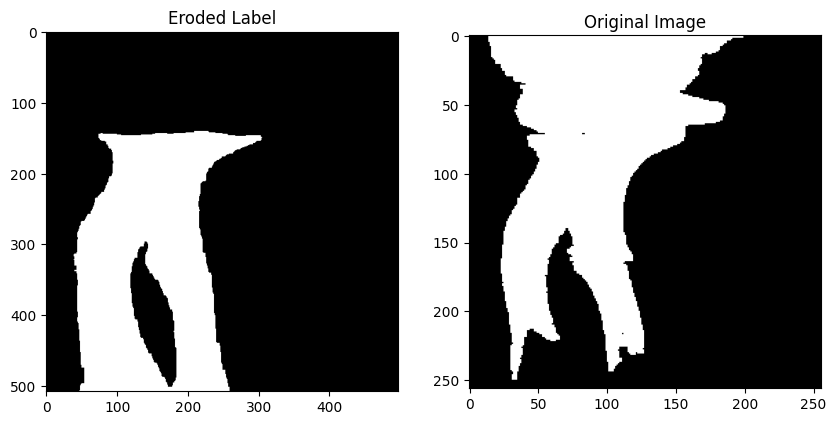

Test Sonuçları: [(141, 209, 0), (141, 210, 0), (141, 211, 0), (141, 212, 0), (141, 213, 0), (141, 214, 0), (141, 215, 0), (141, 216, 0), (141, 217, 0), (141, 218, 0), (141, 219, 0), (141, 220, 0), (141, 221, 0), (141, 222, 0), (141, 223, 0), (141, 224, 0), (141, 225, 0), (141, 226, 0), (141, 227, 0), (141, 228, 0), (142, 209, 0), (142, 210, 0), (142, 211, 0), (142, 212, 0), (142, 213, 0), (142, 214, 0), (142, 215, 0), (142, 216, 0), (142, 217, 0), (142, 218, 0), (142, 219, 0), (142, 220, 0), (142, 221, 0), (142, 222, 0), (142, 223, 0), (142, 224, 0), (142, 225, 0), (142, 226, 0), (142, 227, 0), (142, 228, 0), (142, 229, 0), (143, 197, 0), (143, 198, 0), (143, 199, 0), (143, 200, 0), (143, 201, 0), (143, 202, 0), (143, 203, 0), (143, 204, 0), (143, 205, 0), (143, 206, 0), (143, 207, 0), (143, 208, 0), (143, 209, 0), (143, 210, 0), (143, 211, 0), (143, 212, 0), (143, 213, 0), (143, 214, 0), (143, 215, 0), (143, 216, 0), (143, 217, 0), (143, 218, 0), (143, 219, 0), (143, 220, 0), (143, 22

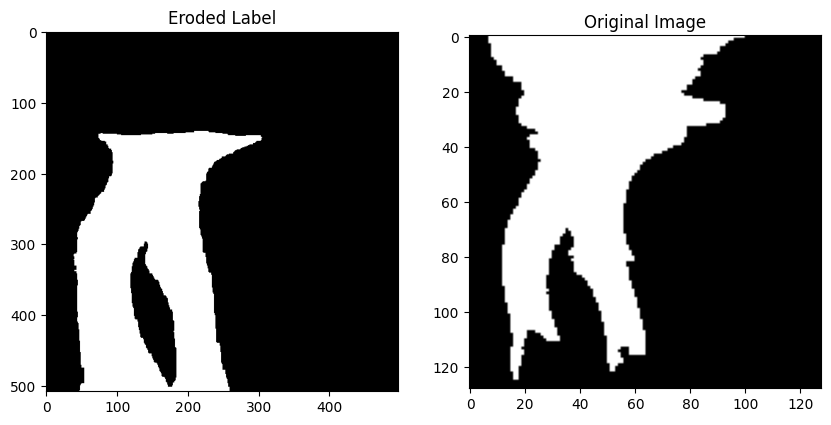

Test Sonuçları: []


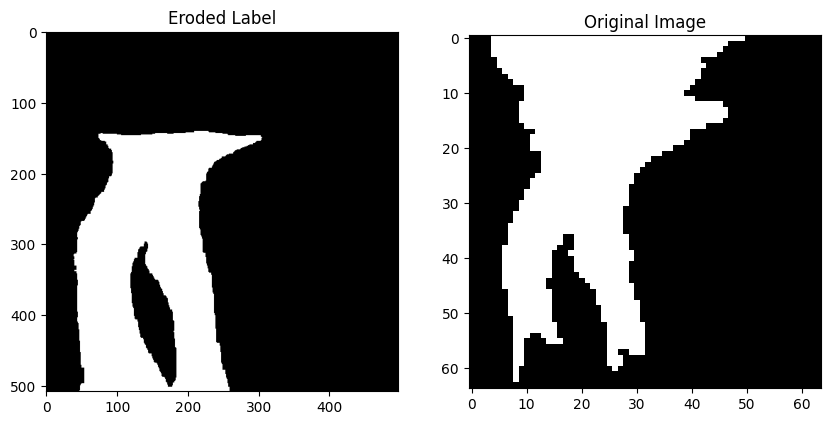

Test Sonuçları: []


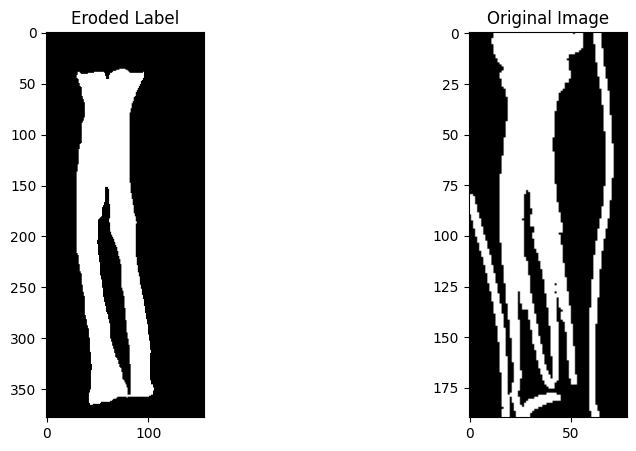

Test Sonuçları: [(37, 69, 0), (37, 70, 0), (38, 66, 0), (38, 67, 0), (38, 68, 0), (38, 69, 0), (38, 70, 0), (39, 31, 0), (39, 32, 0), (39, 47, 0), (39, 48, 0), (39, 49, 0), (39, 50, 0), (39, 51, 0), (39, 52, 0), (39, 53, 0), (39, 54, 0), (39, 55, 0), (39, 56, 0), (39, 65, 0), (39, 66, 0), (39, 67, 0), (39, 68, 0), (39, 69, 0), (39, 70, 0), (40, 31, 0), (40, 32, 0), (40, 33, 0), (40, 41, 0), (40, 42, 0), (40, 43, 0), (40, 44, 0), (40, 45, 0), (40, 46, 0), (40, 47, 0), (40, 48, 0), (40, 49, 0), (40, 50, 0), (40, 51, 0), (40, 52, 0), (40, 53, 0), (40, 54, 0), (40, 55, 0), (40, 56, 0), (40, 57, 0), (40, 63, 0), (40, 64, 0), (40, 65, 0), (40, 66, 0), (40, 67, 0), (40, 68, 0), (40, 69, 0), (40, 70, 0), (41, 31, 0), (41, 32, 0), (41, 33, 0), (41, 34, 0), (41, 35, 0), (41, 36, 0), (41, 37, 0), (41, 38, 0), (41, 39, 0), (41, 40, 0), (41, 41, 0), (41, 42, 0), (41, 43, 0), (41, 44, 0), (41, 45, 0), (41, 46, 0), (41, 47, 0), (41, 48, 0), (41, 49, 0), (41, 50, 0), (41, 51, 0), (41, 52, 0), (41, 53,

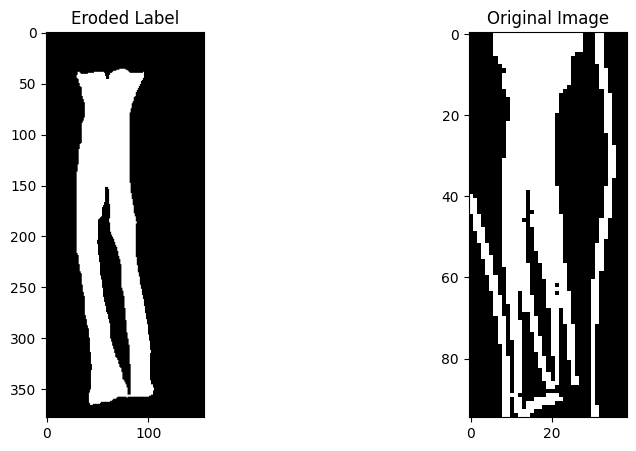

Test Sonuçları: [(39, 31, 0), (40, 31, 0), (41, 31, 0), (42, 30, 0), (42, 31, 0), (43, 30, 0), (43, 31, 0), (44, 30, 0), (44, 31, 0), (45, 31, 0)]


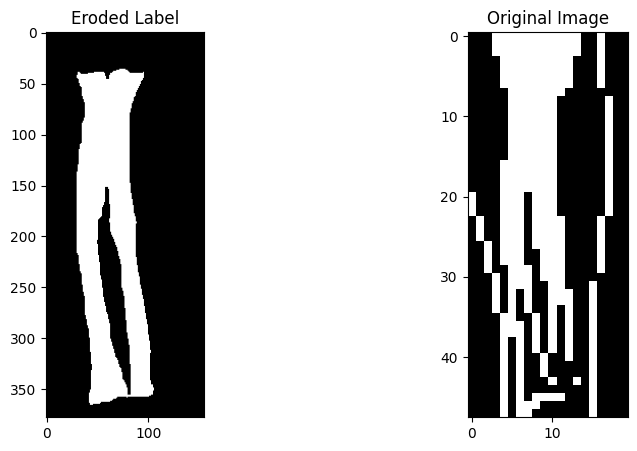

Test Sonuçları: []


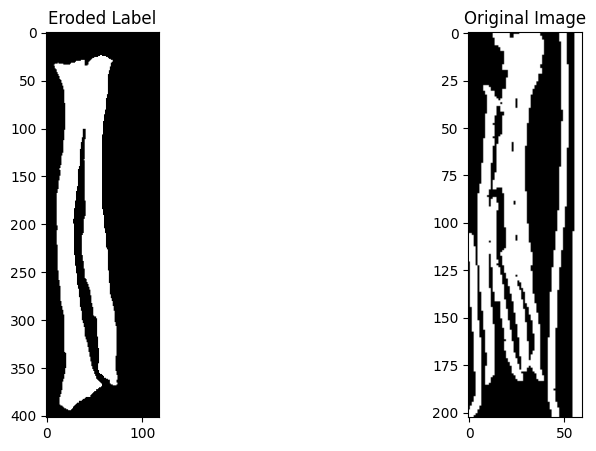

Test Sonuçları: [(26, 50, 0), (26, 51, 0), (26, 52, 0), (27, 48, 0), (27, 49, 0), (27, 50, 0), (27, 51, 0), (27, 52, 0), (28, 47, 0), (28, 48, 0), (28, 49, 0), (28, 50, 0), (28, 51, 0), (28, 52, 0), (29, 36, 0), (29, 37, 0), (29, 38, 0), (29, 39, 0), (29, 46, 0), (29, 47, 0), (29, 48, 0), (29, 49, 0), (29, 50, 0), (29, 51, 0), (29, 52, 0), (30, 31, 0), (30, 32, 0), (30, 33, 0), (30, 34, 0), (30, 35, 0), (30, 36, 0), (30, 37, 0), (30, 38, 0), (30, 39, 0), (30, 45, 0), (30, 46, 0), (30, 47, 0), (30, 48, 0), (30, 49, 0), (30, 50, 0), (30, 51, 0), (30, 52, 0), (31, 30, 0), (31, 31, 0), (31, 32, 0), (31, 33, 0), (31, 34, 0), (31, 35, 0), (31, 36, 0), (31, 37, 0), (31, 38, 0), (31, 39, 0), (31, 44, 0), (31, 45, 0), (31, 46, 0), (31, 47, 0), (31, 48, 0), (31, 49, 0), (31, 50, 0), (31, 51, 0), (31, 52, 0), (32, 12, 0), (32, 26, 0), (32, 27, 0), (32, 28, 0), (32, 29, 0), (32, 30, 0), (32, 31, 0), (32, 32, 0), (32, 33, 0), (32, 34, 0), (32, 35, 0), (32, 36, 0), (32, 37, 0), (32, 38, 0), (32, 39,

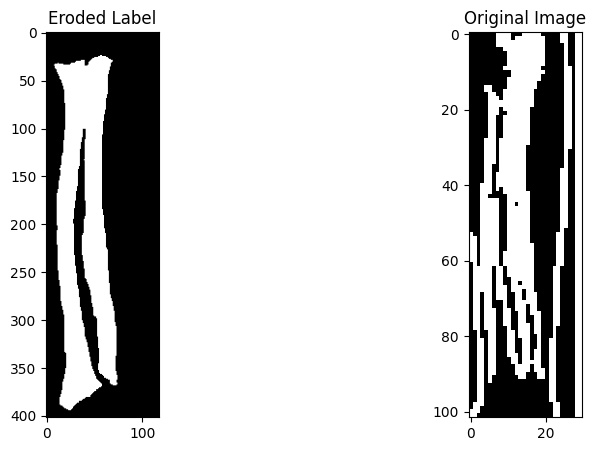

Test Sonuçları: [(32, 12, 0), (33, 9, 0), (33, 10, 0), (33, 11, 0), (33, 12, 0), (33, 13, 0), (33, 14, 0), (33, 15, 0), (33, 16, 0), (33, 17, 0), (34, 8, 0), (34, 9, 0), (34, 10, 0), (34, 11, 0), (34, 12, 0), (34, 13, 0), (34, 14, 0), (34, 15, 0), (34, 16, 0), (34, 17, 0), (34, 18, 0), (34, 19, 0), (34, 20, 0), (34, 21, 0), (34, 22, 0), (35, 9, 0), (35, 10, 0), (35, 11, 0), (35, 12, 0), (35, 13, 0), (35, 14, 0), (35, 15, 0), (35, 16, 0), (35, 17, 0), (35, 18, 0), (35, 19, 0), (35, 20, 0), (35, 21, 0), (35, 22, 0), (36, 9, 0), (36, 10, 0), (36, 11, 0), (36, 12, 0), (36, 13, 0), (36, 14, 0), (36, 15, 0), (36, 16, 0), (36, 17, 0), (36, 18, 0), (36, 19, 0), (36, 20, 0), (36, 21, 0), (36, 22, 0), (37, 9, 0), (37, 10, 0), (37, 11, 0), (37, 12, 0), (37, 13, 0), (37, 14, 0), (37, 15, 0), (37, 16, 0), (37, 17, 0), (37, 18, 0), (37, 19, 0), (37, 20, 0), (37, 21, 0), (37, 22, 0), (38, 10, 0), (38, 11, 0), (38, 12, 0), (38, 13, 0), (38, 14, 0), (38, 15, 0), (38, 16, 0), (38, 17, 0), (38, 18, 0), (

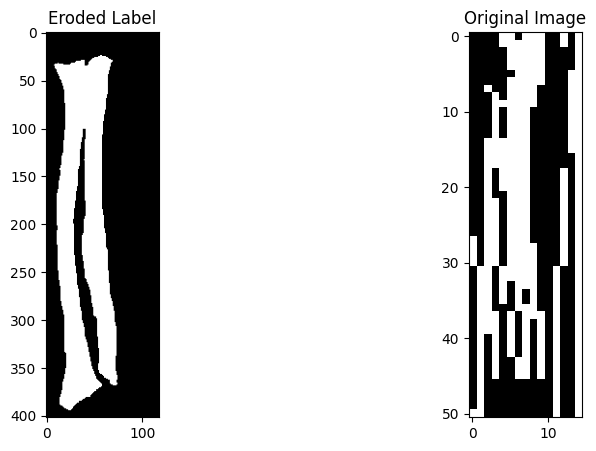

Test Sonuçları: []


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.morphology import erosion, square
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# Erosion işlemi
def apply_erosion(label, size=3):
    if label.ndim == 3:
        label = label[:, :, :3]
        label = rgb2gray(label)

    threshold_value = threshold_otsu(label)
    binary_label = label > threshold_value
    return erosion(binary_label, square(size))

# Görselden patch çıkarma
def extract_patch(image, x, y, patch_size):
    half_size = patch_size // 2
    x_start = max(0, x - half_size)
    x_end = min(image.shape[0], x + half_size + 1)
    y_start = max(0, y - half_size)
    y_end = min(image.shape[1], y + half_size + 1)
    return image[x_start:x_end, y_start:y_end]

def encode_patch_with_hog(patch):
    if patch.ndim == 3:
        patch = rgb2gray(patch)

    if patch.shape[0] < 16 or patch.shape[1] < 16:
        raise ValueError("Patch boyutu HoG için yeterli değil.")

    fd, _ = hog(patch, orientations=9, pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return fd

def test_patches_with_erosion(image, label, patch_size=16, erosion_size=3, threshold=0.1):
    eroded_label = apply_erosion(label, size=erosion_size)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Eroded Label")
    plt.imshow(eroded_label, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.show()

    results = []
    for x in range(eroded_label.shape[0]):
        for y in range(eroded_label.shape[1]):
            if eroded_label[x, y] > 0:
                patch = extract_patch(image, x, y, patch_size)
                if patch.shape[0] < patch_size or patch.shape[1] < patch_size:
                    continue
                try:
                    encoded_patch = encode_patch_with_hog(patch)
                    match_score = np.linalg.norm(encoded_patch - eroded_label[x, y])
                    result = 1 if match_score < threshold else 0
                    results.append((x, y, result))
                except ValueError as e:
                    print(f"Patch at ({x}, {y}) skipped: {e}")
                    continue

    print("Test Sonuçları:", results)

# Görsellerin ve etiketlerin yolları
image_paths = [
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_0.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_6_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_3_level_3.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_1.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_2.png",
    r"C:\Users\songu\Downloads\images\processed_kirik_2_level_3.png"
]

label_paths = [
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik6_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik3_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png",
    r"C:\Users\songu\Downloads\images\kirik2_label.png"
]

# Görselleri ve etiketleri yükleyin
def convert_to_rgb(image):
    if image.ndim == 3 and image.shape[2] == 4:
        image = image[:, :, :3]
    return image

# Tüm görseller ve etiketlerle çalıştırma
for image_path, label_path in zip(image_paths, label_paths):
    image = io.imread(image_path)
    label = io.imread(label_path)

    label = rgb2gray(convert_to_rgb(label)) if label.ndim == 3 else label

    test_patches_with_erosion(image, label, patch_size=16)

